<a href="https://colab.research.google.com/github/pili-zhangqiu/ML-Summer-School/blob/master/AICore_SC_Lesson08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Getting Started**
**Mounting your GDrive**

By mounting the Drive to your Python notebook, you will be able to read and manipulate files stored in your Google *Drive*.

In [7]:
# Import the function to mount the Drive
from google.colab import drive

# This line shows that we will be mounting everything stored in the main GDrive folder
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **ML Using Existing Libraries - Continuous Data**
**Importing Sk-learn**

Scikit-learn is a free machine learning library for Python. It features various algorithms like linear regression, random forests and k-neighbours. It also supports Python numerical and scientific libraries like NumPy and SciPy.

In [21]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the LinearRegression() function from sklearn library
from sklearn.linear_model import LinearRegression

In [20]:
# Use pandas to read the csv
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/BikeSharingDaily.csv')

# Preview of the dataset
print(df.head())

   instant      dteday  season  yr  ...  casual  registered   cnt  numpigeons
0        1  2011-01-01       1   0  ...     331         654   985        1547
1        2  2011-01-02       1   0  ...     131         670   801        1004
2        3  2011-01-03       1   0  ...     120        1229  1349         709
3        4  2011-01-04       1   0  ...     108        1454  1562        1016
4        5  2011-01-05       1   0  ...      82        1518  1600        1185

[5 rows x 17 columns]


In [47]:
# Define the features that will be used in the prediction
features = [df['temp'], df['windspeed'], df['hum']]

# Define the independent and dependent variables
x = np.stack(features, axis=1)
y = np.array(df['cnt'])

# Define the training set (1st-400th entries) and testing set (400th-last entries)
train_split = 400

# x_train = x[:train_split]
# y_train = y[:train_split]

x_train = x[::2]
y_train = y[::2]


**Let's be lazy! Use sklearn library instead of writing the code ourselves**

In [48]:
# Create an object for my model
model = LinearRegression()

# Input the data to fit into my model
model = model.fit(x_train, y_train)

# Generate and store my prediction (y_pred)
y_pred = model.predict(x)

In [34]:
# Calculate your mean squared error (MSE) or cost
def mse_cost(y, y_pred): 
  diffs = y-y_pred
  squared_diffs = np.square(diffs)
  mean_squared_diffs = np.mean(squared_diffs)
  return mean_squared_diffs

2023667.363422142


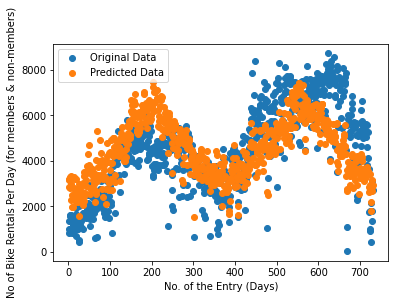

In [49]:
# Calculate and print the cost
cost = mse_cost(y, y_pred)
print(cost)

# Print the scatter plot with the original data and my prediction
plt.scatter(df['instant'], y, label='Original Data')
plt.scatter(df['instant'], y_pred, label='Predicted Data')
plt.legend()
plt.xlabel('No. of the Entry (Days)')
plt.ylabel('No of Bike Rentals Per Day (for members & non-members)')
plt.show()

# **ML Using Existing Libraries - Classification**
**Logistic Regression - Classification in Groups**

In [56]:
# Use pandas to read the csv
iris_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/iris.csv')
print(iris_df.head())

# In the 'class' feature, convert the species names to a numerical equivalent
species_to_num = {
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}

num_to_species = {
    0:'Iris-setosa',
    1:'Iris-versicolor',
    2:'Iris-virginica'
}

iris_df['class'] = iris_df['class'].map(species_to_num)
print()
print(iris_df.head())

   sepal_length(cm)  sepal_width(cm)  ...  petal_width(cm)        class
0               5.1              3.5  ...              0.2  Iris-setosa
1               4.9              3.0  ...              0.2  Iris-setosa
2               4.7              3.2  ...              0.2  Iris-setosa
3               4.6              3.1  ...              0.2  Iris-setosa
4               5.0              3.6  ...              0.2  Iris-setosa

[5 rows x 5 columns]

   sepal_length(cm)  sepal_width(cm)  petal_length(cm)  petal_width(cm)  class
0               5.1              3.5               1.4              0.2      0
1               4.9              3.0               1.4              0.2      0
2               4.7              3.2               1.3              0.2      0
3               4.6              3.1               1.5              0.2      0
4               5.0              3.6               1.4              0.2      0


In [68]:
# Define the features that will be used in the prediction
features = [iris_df[iris_df.columns[0]],iris_df[iris_df.columns[1]],iris_df[iris_df.columns[2]],iris_df[iris_df.columns[3]]]

# Define the independent and dependent variables
x = np.stack(features, axis=1)
y = np.array(iris_df['class'])

# Part 2: Split the data in training set (50%) and testing set (50%)
x_train = x[::2]
y_train = y[::2]

In [64]:
# Import the LogisticRegression() function from sklearn library
from sklearn.linear_model import LogisticRegression

# ------------------------------------------------------------------------------
# Create an object for my model
model = LogisticRegression()

# Input the data to fit into my model
model = model.fit(x_train, y_train)

# Generate and store my prediction (y_pred)
y_pred = model.predict(x)

# ------------------------------------------------------------------------------

In [65]:
# Compute and print accuracy
accuracy = model.score(x,y)

print('Accuracy', accuracy)

Accuracy 0.9133333333333333


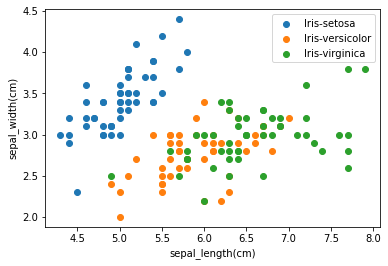

In [66]:
# Plotting by class group
groups = iris_df.groupby('class')

for name, group in groups:
  plt.scatter(group['sepal_length(cm)'], group['sepal_width(cm)'], label = num_to_species[name])

plt.xlabel('sepal_length(cm)')
plt.ylabel('sepal_width(cm)')
plt.legend()

**How to group by unique values when the data is not a dataframe (df, from CSV)**

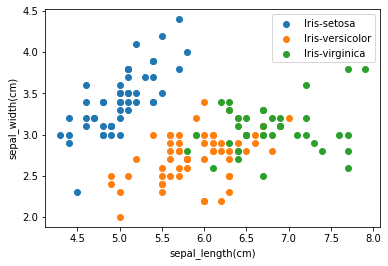

In [67]:
# Plotting by class group (for non-dataframe data)
for unique_val in np.unique(y):
  x_gr = x[y_pred==unique_val]
  plt.scatter(x_gr[:,0],x_gr[:,1], label=num_to_species[unique_val])

plt.xlabel('sepal_length(cm)')
plt.ylabel('sepal_width(cm)')
plt.legend()

# **Confusion Matrix for Logistic Regression Models**
In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm.

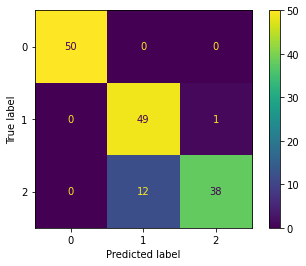

In [69]:
# Import the confusion matrix function
from sklearn.metrics import plot_confusion_matrix

# Plot the confusion matrix
plot_confusion_matrix(model, x, y)

**Why is accuracy not always the best way to assess how good a model is?**

The answer is NO. But why? Let's think of an example

We have a dataset containing 100 pics: 95 of dogs, 5 of cats. I need to create an algorithm to predict if it is a dog or not. Then, I create an algorithm that predicts dog everytime, no matter the situation. Would you say it is a good algorithm? The **accuracy** of my algorithm is 95%, but that doesn't make it a good model.

That's why cannot only use accuracy to see how good a model is, but also **recall** and **precision**.

![alt text](https://miro.medium.com/max/1872/1*pOtBHai4jFd-ujaNXPilRg.png)
*Image from towardsdatascience.com.*


**Recall and Precision**

While accuracy is 'global', precision and recall are specific to each group:

Dog category 
* precision = 95 (true positive) / 95 (true positive) + 5 (false positive) = 0.95
* recall = 95 (true positive) / 95 (true positive) + 0 (false negative) = 1

Cat category
* precision = 0 (true positive) / 0 (true positive) + 0 (false positive) = indefined or '0'
* recall = 0 (true positive) / 0 (true positive) + 5 (false negative) = 0

Therefore, for the model the mean precision, mean recall and accuracy are:
* mean precision = 0.475
* mean recall = 0.5
* accuracy = 0.95

In [70]:
# To better assess how good your ML model is, use F1 Score
# f1 score is the harmonic mean of precision and recall

# Import the F1 Score Function
from sklearn.metrics import f1_score

# Compute and print the F1 score
f1 = f1_score(y, y_pred, average="weighted")
print('F1 score', f1)

F1 score 0.9122718223841821
